In [33]:
#Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points).
#Be sure to review the readings before you start on this assignment. 
#Calculate the sum of least square error for each different values of 'k'. 
# Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points).
# Finally plot the optimal clusters with their centroids along with a brief explanation (50 points).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [13]:
diabetes_data = pd.read_csv('diabetic_data.csv')

In [15]:
#Select numerical features to use for clustering

numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 
    'number_inpatient', 'number_diagnoses'
]

# Create a subset dataframe with just these columns
df_diabetes_numeric = diabetes_data[numeric_cols]

In [17]:
# Scale the data
#so that each feature contributes equally to the distance calculations in K-Means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_diabetes_numeric)

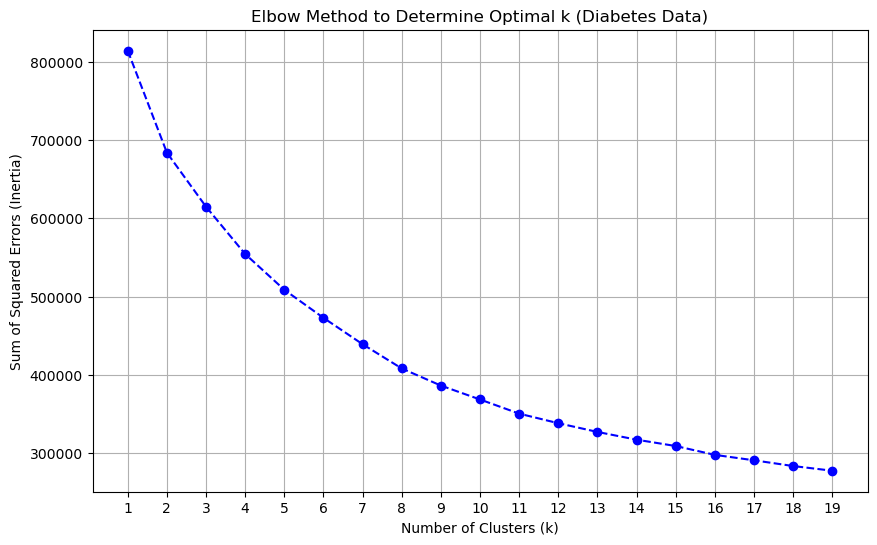

In [ ]:
#The Elbow Method to Determine Optimal k
k_values = range(1, 20) # Testing k from 1 to 19, I used 10 numbers before but the elbow was not that clear
sse = []  # To store the Sum of Squared Errors for each k

for k in k_values:
    # Run K-Means for each k
    # n_init=10 means it will run the algorithm 10 times with different starting points and pick the best one
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) #42 is the answer to life, universe and everything
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal k (Diabetes Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [30]:
#Clustering & Visualization (PCA)

#I choose k=8 for this, but the plot shows that even k of 8 would be reasonable, or 14, because the change in slope is less pronounced after these points.
optimal_k = 8

#Train the final model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(df_scaled)

#Dimensionality Reduction (PCA)
# We can use PCA to compress the variance into 2 Principal Components (2D space).
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

In [31]:
#Transform Centroids
#The centroids are in 8D space taking the variables used. We project them to 2D to plot them.
centroids_2d = pca.transform(kmeans_final.cluster_centers_)

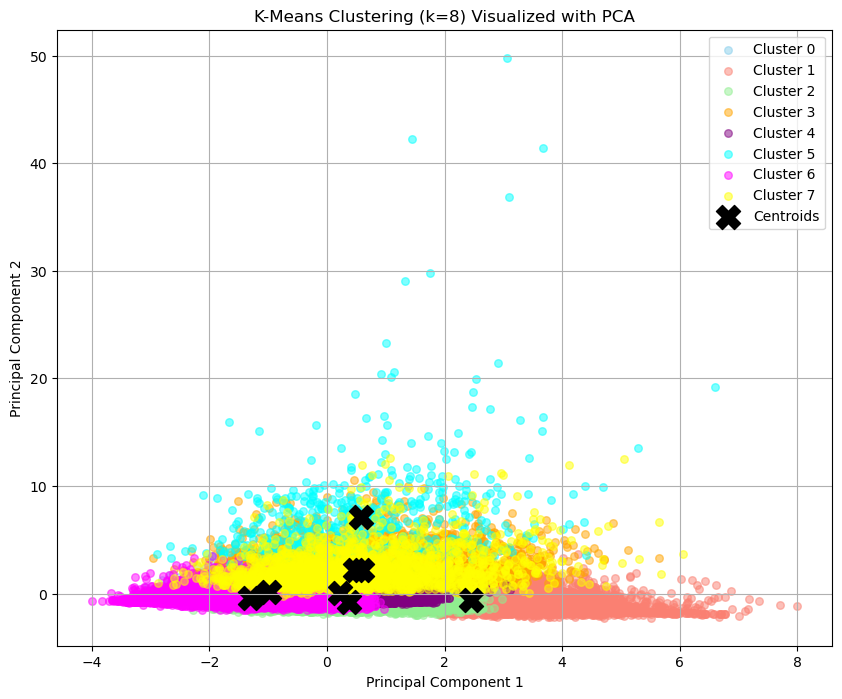

In [32]:
#Plot the Clusters
plt.figure(figsize=(10, 8))

# Scatter plot of data points
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'grey']
for i in range(optimal_k):
    # Select points belonging to the current cluster
    points = principal_components[labels == i]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i}', alpha=0.5)

# Plot Centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], 
            s=300, c='black', marker='X', label='Centroids')

plt.title(f'K-Means Clustering (k={optimal_k}) Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Here we can see that the patients group together based on their numerical usage patterns (medications, lab tests, hospital stays and etc). 
#PCA allows us to see these multi-dimensional relationships in 2D. Even though k=8 seemed the best choice for the clustering, the data still seems very complex. 
# The black 'X's represent the "average patient" for each cluster or centroid. In the future, we could analyze these clusters further to understand the characteristics of each patient group.
# or play along with how many variables to use.